In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [2]:
obs = 15
np.random.seed(15)
data = np.random.randint(0,5, obs*5).reshape(obs,5)
data_unique = np.unique(data, axis=0)
xs = np.c_[np.ones([data_unique.shape[0]]), data_unique] 
xs.shape

(15, 6)

In [3]:
xs[:4]

array([[1., 0., 3., 0., 4., 3.],
       [1., 0., 3., 2., 4., 2.],
       [1., 0., 4., 0., 4., 3.],
       [1., 0., 4., 4., 4., 3.]])

In [4]:
ys = np.random.choice(list(range(1,10)), obs)
ys.resize(obs,1)
ys[:4]

array([[5],
       [3],
       [3],
       [4]])

In [5]:
weights = lambda ins, outs: np.random.randn(ins, outs)

In [76]:
ins = 5
outs = 1
nodes = 18
lr = .01

w0 = weights(ins+1, nodes)
w1 = weights(nodes, outs) 
err = []

In [77]:
for i in range(10000):
    x0 = xs
    z0 = x0 @ w0
    x1 = np.sin(z0)
    yh = x1 @ w1
    
    e = (yh - ys) * 1
    e0 = (e * w1.T) * np.cos(z0)

    w1 -= (x1.T @ e) * lr
    w0 -= (x0.T @ e0) * lr
    
    e = np.sum(np.abs(e))
    
    if e < .01:
        print('we have converged after {} iterations'.format(i))
        print(w1)
        break
    err.append(e)

we have converged after 129 iterations
[[-0.52080853]
 [ 0.7692883 ]
 [-0.70629853]
 [ 0.52639269]
 [ 0.68497101]
 [ 0.29630223]
 [ 0.71126254]
 [ 0.71975   ]
 [ 0.70615   ]
 [ 0.8251325 ]
 [ 0.76207451]
 [ 0.34926417]
 [ 0.46460916]
 [ 0.42061094]
 [-0.38931221]
 [ 0.77326433]
 [-0.36782872]
 [ 0.54072443]]


In [78]:
len(err), min(err)

(129, 0.010701498877569993)

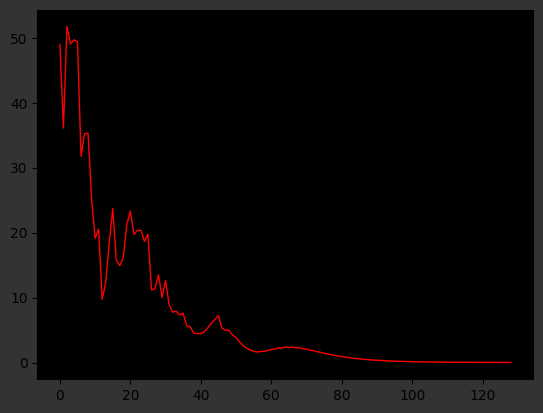

In [79]:
plt.axes().set_facecolor('black')
plt.plot(err,color='red', linewidth=1)
plt.show()

In [81]:
yh

array([[5.0007011 ],
       [3.00163116],
       [2.9987881 ],
       [4.00077835],
       [4.00006777],
       [5.00011207],
       [4.00002795],
       [6.00011648],
       [3.9995493 ],
       [0.99964208],
       [1.00057525],
       [6.99937135],
       [2.00096761],
       [3.00082232],
       [2.99864103]])

In [82]:
ys

array([[5],
       [3],
       [3],
       [4],
       [4],
       [5],
       [4],
       [6],
       [4],
       [1],
       [1],
       [7],
       [2],
       [3],
       [3]])